In [ ]:
#Primero conectemos la maquina virtual con el drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


# Los datos para correr este código se encuentran en la unidad compartida del grupo GENSyR (Grupo de estudio de neurociencia, sistemas y redes), si ya está ingresadx en el drive podrá correr el codigo sin problemas

In [ ]:
cd /gdrive/Shareddrives/GENSyR /CNF (Complejidad y NeuroFísica)/Neurofísica/Proyecto lesiones

/gdrive/Shareddrives/GENSyR /CNF (Complejidad y NeuroFísica)/Neurofísica/Proyecto lesiones


In [ ]:
ls

'Conectividad funcional'/
'EDA Estructurales y funcionales- Hubs.ipynb'
 estructural_hammersmith.npy
 Estructural_Promedio.npy
 funcional_hammersmith.npy
 Funcional_Promedio.npy
 Hammersmith2.csv.gsheet
 Hammersmith.gsheet
 initial_condition.bin
'Ising - Entropia '/
'LESIONES - RESULTADOS'/
 M2final.npy
 matriz_asimetri_simetri_threshold.npy
 MATRIZFUNCIONAL_TASKMOTOR.npy
 matriz_sinasimetrizar_threshold.npy
 Mfinal.npy
 otronombre.csv
'Redes Estructurales y funcionales- Hubs.ipynb'
'Redes Funcionales - Hubs.ipynb'
 restingstate_functionalconnectivity.npy
 Tractografia/


In [ ]:
#se importan librerias y se cargan las matrices con numpy
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd 
#carguemos las matrices estructural y funcional
estructural1 = np.load("estructural_hammersmith.npy")
funcional = np.load("funcional_hammersmith.npy")
# dada la gran diferencia en cantidad de tractos es necesario aplicar el logaritmo para linealizar los datos
estructural = np.log1p(estructural1)
estructural[0] = np.zeros(len(estructural[0]))
estructural[:][0] = np.zeros(len(estructural[0]))
#Se hace la diagonal igual a 0 para las dos matrices 
for i in range(len(estructural)-1):
  estructural[i+1][i+1] = 0
  funcional[i][i] = 0

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]


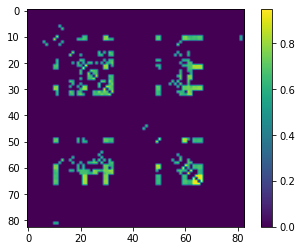

In [ ]:
#matriz_asimetri_simetri_threshold.npy
 #MATRIZFUNCIONAL_TASKMOTOR.npy
 #matriz_sinasimetrizar_threshold.npy
asd = np.load("matriz_sinasimetrizar_threshold.npy")
#asd = asd*(asd > 0.6)
plt.imshow(asd)
plt.colorbar()
gestructural2 = nx.convert_matrix.from_numpy_array(asd)
print(gestructural2.nodes())
isolados_funcional = list(nx.isolates(gestructural2))
gestructural2.remove_nodes_from(isolados_funcional)
Gcc = sorted(nx.connected_components(gestructural2), key=len, reverse=True)
gestructural2 = gestructural2.subgraph(Gcc[0])

#gestructural2.remove_node(0) #quitamos la parcela "null" de la red estructural
#gestructural2.remove_nodes_from(list(nx.isolates(gestructural2)))

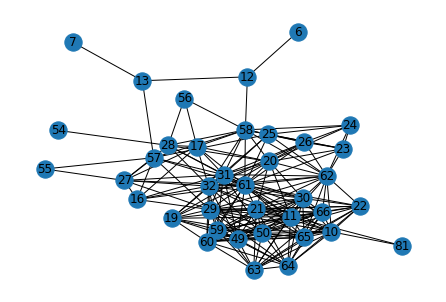

In [ ]:
nx.draw_kamada_kawai(gestructural2,with_labels=True)

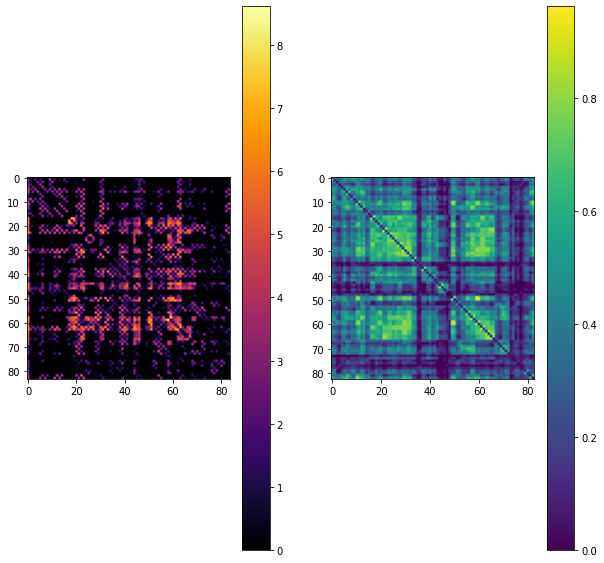

In [ ]:
#Definamos el threshold que se le aplicará a las matrices
estructural_threshold = 0
funcional_threshold = 0

#apliquemos el threshold
estruc = estructural*(estructural > estructural_threshold)
func = funcional*(funcional > funcional_threshold)

#ploteemos
plt.figure(figsize = (10,10))
plt.subplot(121)
plt.imshow(estruc,cmap = "inferno")
plt.colorbar()
plt.subplot(122)
plt.imshow(func)
plt.colorbar()


In [ ]:
#Ahora creemos los grafos a partir de las matrices
estruc = np.load("matriz_asimetri_simetri_threshold.npy")
gestructural = nx.convert_matrix.from_numpy_array(estruc)
#gfuncional = nx.convert_matrix.from_numpy_array(func)

gestructural.remove_node(0) #quitamos la parcela "null" de la red estructural

#Comprobamos que los dos grafos sean pesados
#print(nx.is_weighted(gfuncional),nx.is_weighted(gestructural))

In [ ]:

#Ahora leamos el archivo con los labels correspondientes a esta parcelación, este archivo también está en el Drive de GENSyR
#labelcsv = pd.read_csv("AAL.csv")
labelcsv = pd.read_csv("otronombre.csv")


In [ ]:
def plothubs(Grafo,n_ranking,rank,medida):
  """
  n_ranking: número de nodos a los que se les mostrará el nombre y se les cambiara el color
  rank: nombre de la medida que define el ranking (grafo, intermediacion, eigenvector, clusterizacion) o ingrese directamente el diccionario con la medida producto de networkx
  medida: nombre de la medida que define el tamaño del os nodos, mismos nombres posibles que en rank o ingrese directamente el diccionario con la medida producto de networkx
  """
  grafo = Grafo.copy()
  if rank == "grado":
    rank = nx.degree_centrality(grafo)
  if rank == "intermediacion":
    rank = nx.betweenness_centrality(grafo)
  if rank == "eigenvector":
    rank = nx.eigenvector_centrality(grafo)
  if rank == "clusterizacion":
    rank = nx.clustering(grafo)

  if medida == "grado":
    medida = nx.degree_centrality(grafo)
    tamañoprom = 25000
  if medida == "intermediacion":
    medida = nx.betweenness_centrality(grafo)
    tamañoprom = 100000
  if medida == "eigenvector":
    medida = nx.eigenvector_centrality(grafo)
    tamañoprom = 40000
  if medida == "clusterizacion":
    medida = nx.clustering(grafo)
    tamañoprom = 10000

  lista = list(rank.values())
  lista.sort()
  #Ponemos los labels al grafo
  colors = np.ones((len(grafo.nodes())))*0
  top = []
  for i in range(len(grafo.nodes())):
    if rank[i+1] >= lista[len(lista)-n_ranking]:
      colors[i] = 1
      prueba = { i+1 : labelcsv.values[i][1]}
      top.append((labelcsv.values[i][1],rank[i+1]))
      grafo = nx.relabel_nodes(grafo,prueba)
  plt.figure(figsize=(16,16))
  nx.draw_kamada_kawai(grafo, node_size = [medida[i]*tamañoprom for i in Grafo.nodes()], with_labels = True, node_color = colors, vmin = 0, vmax = 1)
  plt.show()
  print(top)
  return;

In [ ]:
def strenght(grafo):
  adyacencia = nx.convert_matrix.to_numpy_array(grafo)
  strenght = np.zeros(len(grafo.nodes()))
  for i in range(len(grafo.nodes())):
    strenght[i] = np.sum(adyacencia[i])
  return strenght
  
def plotmedidas(Grafo,medidarank):
  grafo = Grafo.copy()
  #removemos los nodos isolados para calcular las medidas
  grafo.remove_nodes_from(list(nx.isolates(grafo)))
  # Las medidas planteadas en el trabajo para hallar los hubs son bastante estándar, razón por la cual Networkx incorpora funciones para calcularlas 

  #Medidas de integración 
  grado = nx.degree_centrality(grafo)
  intermediacion = nx.betweenness_centrality(grafo)
  comunicabilidad = nx.communicability(grafo)
  eigenvector = nx.eigenvector_centrality(grafo)

  #Medida de segregación
  clusterización = nx.clustering(grafo)

  #la estructura de datos de las medidas es un diccionario, el cual contiene unas llaves y unos valores asociados a esas llaves

  #Ahora se extraeran los valores
  deg = list(grado.values())

  inter = list(intermediacion.values())

  eigen = list(eigenvector.values())

  clust = list(clusterización.values())

  com = []

  #la comunicabilidad es una medida para cada par de nodos, en este caso lo que se está haciendo es tomar la comunicabilidad del nodo i como la suma de sus comunicabilidades
  #con todos los otros nodos
  for i in comunicabilidad.keys():
    sum = 0
    for j in comunicabilidad[i].keys():
      sum = sum + comunicabilidad[i][j]
    com.append(sum)
  #normalicemos la medida para que esté entre 0 y 1
  a = np.max(com)
  com = com/a
  #reorganicemos las medidas para que queden de mayor a menor grado
  deg2 = deg.copy()
  inter2=inter.copy()
  eigen2=eigen.copy()
  clust2=clust.copy()
  com2 = com.copy()
  indexs = []
  if medidarank == "grado":
    rank = deg
    rank_orden = rank.copy()
    rank_orden.sort()
    for i in rank_orden:
      indexs.append(rank.index(i))
    for i in range(len(deg)):
      deg2[i] = deg[indexs[i]]
    for i in range(len(inter)):
      inter2[i] = inter[indexs[i]]
    for i in range(len(clust)):
      clust2[i] = clust[indexs[i]]
    for i in range(len(eigen)):
      eigen2[i] = eigen[indexs[i]]
    for i in range(len(com)):
      com2[i] = com[indexs[i]]
  if medidarank == "intermediacion":
    rank = inter
    rank_orden = rank.copy()
    rank_orden.sort()
    for i in rank_orden:
      indexs.append(rank.index(i))
    for i in range(len(deg)):
      deg2[i] = deg[indexs[i]]
    for i in range(len(inter)):
      inter2[i] = inter[indexs[i]]
    for i in range(len(clust)):
      clust2[i] = clust[indexs[i]]
    for i in range(len(eigen)):
      eigen2[i] = eigen[indexs[i]]
    for i in range(len(com)):
      com2[i] = com[indexs[i]]
  if medidarank == "eigenvector":
    rank = eigen
    rank_orden = rank.copy()
    rank_orden.sort()
    for i in rank_orden:
      indexs.append(rank.index(i))
    for i in range(len(deg)):
      deg2[i] = deg[indexs[i]]
    for i in range(len(inter)):
      inter2[i] = inter[indexs[i]]
    for i in range(len(clust)):
      clust2[i] = clust[indexs[i]]
    for i in range(len(eigen)):
      eigen2[i] = eigen[indexs[i]]
    for i in range(len(com)):
      com2[i] = com[indexs[i]]
  if medidarank == "clusterizacion":
    rank = clust
    rank_orden = rank.copy()
    rank_orden.sort()
    for i in rank_orden:
      indexs.append(rank.index(i))
    for i in range(len(deg)):
      deg2[i] = deg[indexs[i]]
    for i in range(len(inter)):
      inter2[i] = inter[indexs[i]]
    for i in range(len(clust)):
      clust2[i] = clust[indexs[i]]
    for i in range(len(eigen)):
      eigen2[i] = eigen[indexs[i]]
    for i in range(len(com)):
      com2[i] = com[indexs[i]]
  
  plt.figure(figsize=(10,10))
  plt.subplot(321)
  plt.plot(deg2)
  plt.title("grado")
  plt.subplot(322)
  plt.plot(inter2)
  plt.title("intermediacion")
  plt.subplot(323)
  plt.plot(clust2)
  plt.title("clusterizacion")
  plt.subplot(324)
  plt.plot(eigen2)
  plt.title("eigenvector")
  plt.subplot(325)
  plt.plot(com2)
  plt.title("comunicabilidad")
  plt.show()
  return;

In [ ]:
label = gestructural2.nodes()

In [ ]:
def strenght(grafo):
  adyacencia = nx.convert_matrix.to_numpy_array(grafo)
  strenght = np.zeros(len(grafo.nodes()))
  for i in range(len(grafo.nodes())):
    strenght[i] = np.sum(adyacencia[i])
  return strenght

s = strenght(gestructural)
grado = nx.degree_centrality(gestructural)
intermediacion = nx.betweenness_centrality(gestructural,weight='weight')
eigenvector = nx.eigenvector_centrality(gestructural,weight='weight',max_iter =10000000)
clust = nx.clustering(gestructural,weight='weight')

grados = list(grado.values())
intermediacions = list(intermediacion.values())
eigenvectors = list(eigenvector.values())
clusts = list(clust.values())
labels = labelcsv.to_numpy()
label = []
for i in range(len(labels)):
  label.append(labels[i][1])

dictt = {"labels" : label, "strenght" :s , "grado" : grados, "intermediacion" : intermediacions, "eigenvector" : eigenvectors, "clusterizacion" : clusts }
#prueba = np.zeros((len(label),len(s),len(intermediacions),len(eigenvectors),len(clusts)))
#array = np.array([label,s,grados, intermediacions,eigenvectors,clusts])

import numpy as np
import pandas as pd
print(len(label),len(s),len(grados),len(intermediacions),len(eigenvectors),len(clusts))

df = pd.DataFrame(dictt)

print(df)
print(type(df))
excel = df.to_csv("estruc_sinasimetrizarcsimetri.csv",sep=",")

83 83 83 83 83 83
                                     labels  ...  clusterizacion
0                             R_Hippocampus  ...             0.0
1                             L_Hippocampus  ...             0.0
2                                R_Amygdala  ...             0.0
3                                L_Amygdala  ...             0.0
4      R_Anterior_temporal_lobe_medial_part  ...             0.0
..                                      ...  ...             ...
78                       R_Subcallosal_area  ...             0.0
79           L_Pre-subgenual_frontal_cortex  ...             0.0
80           R_Pre-subgenual_frontal_cortex  ...             0.0
81  L_Superior_temporal_gyrus_anterior_part  ...             0.0
82  R_Superior_temporal_gyrus_anterior_part  ...             0.0

[83 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>


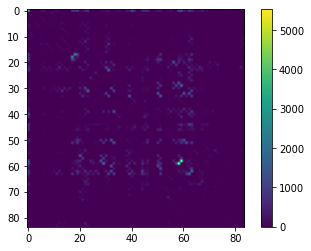

In [ ]:
plt.imshow(asd)
plt.colorbar()

In [ ]:
#Ejemplo del uso de la función plothubs, acá estamos visualizando el nombre (nodos amarillos) de los 10 nodos con más alta clusterización, a su vez 
#el tamaño de los nodos es acorde a la misam clusterización. 10000 es un parámetro para ajustar el gráfico del tamaño de los nodos.
# en esta función se puede elegir cualquiera de las siguientes medidas: grado, clusterizacion, intermediacion, centralidad de eigenvector
plothubs(gestructural,10,"clusterizacion","clusterizacion")

#A continuación se trabajará lo referente a la entrega "calculos relevantes"
#por lo cual se buscarán los hubs


#A continuación se presentan comparaciones del ranking de algunas medidas y su pocisión en la red 

In [ ]:
print(nx.betweenness_centrality(gestructural))

{1: 0.00027495464369112487, 2: 0.0030013861811513123, 3: 0.0, 4: 0.0, 5: 0.008496010570376085, 6: 0.05537955634786461, 7: 0.00011251153075904656, 8: 5.018568704205561e-05, 9: 0.0008760450750482798, 10: 0.0003835098450003319, 11: 0.0020607092754894715, 12: 0.0065361173119995565, 13: 0.004688352562660019, 14: 0.0003211883970691559, 15: 0.00019572417946401687, 16: 0.0015160017913394257, 17: 0.0018285343314464629, 18: 0.0008258273335654071, 19: 0.03050630080236842, 20: 0.030611046358721757, 21: 0.020589177014297723, 22: 0.06611157849317367, 23: 0.08697300945271294, 24: 0.002408270943388028, 25: 0.0033958431879735837, 26: 0.00037367250423204514, 27: 0.000597473219225172, 28: 0.0023559629512762918, 29: 0.0038250720362536608, 30: 0.034887899536183625, 31: 0.043136063832311035, 32: 0.0002801171847036282, 33: 0.0028826037512605924, 34: 0.00028846414272490757, 35: 0.00017410945595227437, 36: 0.0, 37: 0.0, 38: 0.006197041327084991, 39: 0.02929185981447004, 40: 0.03815070425477252, 41: 0.015780886

In [ ]:
print(nx.betweenness_centrality(gestructural,weight = True))

{1: 0.00027495464369112487, 2: 0.0030013861811513123, 3: 0.0, 4: 0.0, 5: 0.008496010570376085, 6: 0.05537955634786461, 7: 0.00011251153075904656, 8: 5.018568704205561e-05, 9: 0.0008760450750482798, 10: 0.0003835098450003319, 11: 0.0020607092754894715, 12: 0.0065361173119995565, 13: 0.004688352562660019, 14: 0.0003211883970691559, 15: 0.00019572417946401687, 16: 0.0015160017913394257, 17: 0.0018285343314464629, 18: 0.0008258273335654071, 19: 0.03050630080236842, 20: 0.030611046358721757, 21: 0.020589177014297723, 22: 0.06611157849317367, 23: 0.08697300945271294, 24: 0.002408270943388028, 25: 0.0033958431879735837, 26: 0.00037367250423204514, 27: 0.000597473219225172, 28: 0.0023559629512762918, 29: 0.0038250720362536608, 30: 0.034887899536183625, 31: 0.043136063832311035, 32: 0.0002801171847036282, 33: 0.0028826037512605924, 34: 0.00028846414272490757, 35: 0.00017410945595227437, 36: 0.0, 37: 0.0, 38: 0.006197041327084991, 39: 0.02929185981447004, 40: 0.03815070425477252, 41: 0.015780886

In [ ]:
plothubs(gestructural,10,"grado","intermediacion")

#

In [ ]:
plothubs(gestructural,10,"grado","clusterizacion")

In [ ]:
plothubs(gestructural,10,"grado","eigenvector")

In [ ]:
plothubs(gestructural,10,"clusterizacion","grado")

In [ ]:
plothubs(gestructural,10,"clusterizacion","intermediacion")

In [ ]:
plothubs(gestructural,10,"clusterizacion","eigenvector")

In [ ]:
plothubs(gestructural,10,"intermediacion","grado")

In [ ]:
plothubs(gestructural,10,"intermediacion","clusterizacion")

In [ ]:
plothubs(gestructural,10,"intermediacion","eigenvector")

In [ ]:
plothubs(gestructural,10,"eigenvector","grado")

In [ ]:
plothubs(gestructural,10,"eigenvector","intermediacion")

In [ ]:
plothubs(gestructural,10,"eigenvector","clusterizacion")

In [ ]:
gestructural.edges(data=True)

EdgeDataView([(1, 3, {'weight': 2.639057329615259}), (1, 5, {'weight': 2.1972245773362196}), (1, 9, {'weight': 5.288267030694535}), (1, 11, {'weight': 2.0794415416798357}), (1, 13, {'weight': 1.0986122886681096}), (1, 15, {'weight': 3.1354942159291497}), (1, 23, {'weight': 4.04305126783455}), (1, 31, {'weight': 3.8918202981106265}), (1, 44, {'weight': 1.3862943611198906}), (1, 45, {'weight': 1.3862943611198906}), (1, 46, {'weight': 2.5649493574615367}), (1, 47, {'weight': 2.5649493574615367}), (1, 63, {'weight': 4.07753744390572}), (1, 67, {'weight': 1.3862943611198906}), (2, 4, {'weight': 3.4965075614664802}), (2, 6, {'weight': 3.58351893845611}), (2, 10, {'weight': 4.499809670330265}), (2, 16, {'weight': 2.0794415416798357}), (2, 20, {'weight': 1.0986122886681096}), (2, 30, {'weight': 3.912023005428146}), (2, 46, {'weight': 2.1972245773362196}), (2, 48, {'weight': 2.302585092994046}), (2, 62, {'weight': 3.4657359027997265}), (3, 5, {'weight': 4.442651256490317}), (3, 9, {'weight': 3.

In [ ]:
def strenght(grafo):
  adyacencia = nx.convert_matrix.to_numpy_array(grafo)
  strenght = np.zeros(len(grafo.nodes()))
  for i in range(len(grafo.nodes())):
    strenght[i] = np.sum(adyacencia[i])
  return strenght


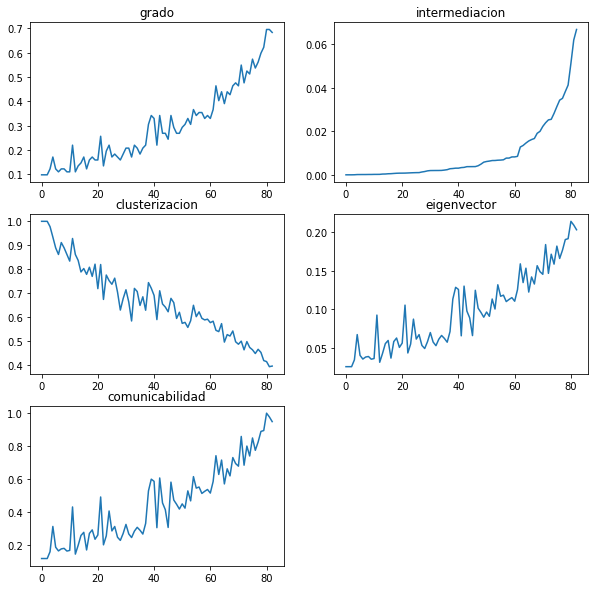

In [ ]:
plotmedidas(gestructural,"intermediacion")

[  2.77258872   7.27239839  12.34757221  14.95718234  19.99162395
  20.4381712   21.77451961  23.18856389  24.368957    25.35836919
  26.4032203   26.56303622  28.02175294  28.40653607  29.32761289
  30.37658648  31.4902032   31.73188944  33.72392975  34.47575033
  35.25674386  36.55542219  38.01122735  39.01544467  39.81872933
  42.10343808  42.98620403  43.07541501  43.38613052  43.38727965
  43.72693176  44.38505616  45.39020107  47.07360596  47.12904435
  48.38118464  48.38974374  49.48417075  54.83221201  56.15951615
  58.24141688  60.47585701  62.52691753  64.15497187  64.76901961
  70.05460905  73.26381901  73.43660805  77.16822968  77.96403664
  78.14295022  82.09220317  84.44660683  84.76431687  86.60897547
  87.60970271  89.3286422   90.70995652  91.34653011  97.08063271
 100.70582858 109.0949856  109.2689213  112.57434319 118.43481947
 122.92757583 124.90152243 125.44699459 132.00831256 136.04838843
 138.36961869 141.56029058 147.97186496 150.87547402 151.53375418
 154.46520

(array([ 2.,  2., 10.,  8., 11.,  5.,  5.,  3.,  5.,  5.,  3.,  2.,  3.,
         1.,  3.,  3.,  2.,  3.,  0.,  1.,  1.,  3.,  1.,  0.,  1.]),
 array([  2.77258872,  11.33937734,  19.90616596,  28.47295458,
         37.0397432 ,  45.60653181,  54.17332043,  62.74010905,
         71.30689767,  79.87368629,  88.4404749 ,  97.00726352,
        105.57405214, 114.14084076, 122.70762938, 131.274418  ,
        139.84120661, 148.40799523, 156.97478385, 165.54157247,
        174.10836109, 182.67514971, 191.24193832, 199.80872694,
        208.37551556, 216.94230418]),
 <a list of 25 Patch objects>)

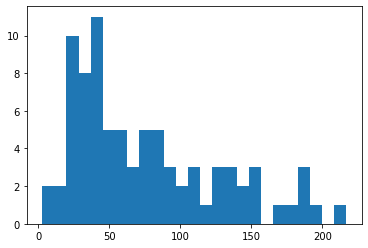

In [ ]:
s = strenght(gestructural)
stre = s.copy()
stre.sort()
print(stre)
plt.hist(stre,bins = 25)

(array([ 1.,  2.,  9.,  2.,  6., 10.,  7.,  0.,  1.,  4.,  5.,  3.,  6.,
         4.,  5.,  1.,  3.,  3.,  2.,  1.,  2.,  1.,  2.,  1.,  2.]),
 array([0.01696424, 0.02485441, 0.03274458, 0.04063475, 0.04852491,
        0.05641508, 0.06430525, 0.07219542, 0.08008558, 0.08797575,
        0.09586592, 0.10375609, 0.11164625, 0.11953642, 0.12742659,
        0.13531676, 0.14320692, 0.15109709, 0.15898726, 0.16687743,
        0.17476759, 0.18265776, 0.19054793, 0.1984381 , 0.20632826,
        0.21421843]),
 <a list of 25 Patch objects>)

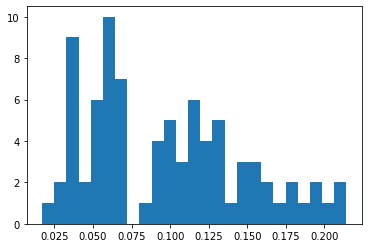

In [ ]:
grado = nx.eigenvector_centrality(gestructural)
values = grado.values()
values = np.array(list(values))
plt.hist(values,bins = 25)

In [ ]:
1,R_Hippocampus
2,L_Hippocampus
3,R_Amygdala
4,L_Amygdala
5,R_Anterior_temporal_lobe_medial_part
6,L_Anterior_temporal_lobe_medial_part
7,R_Anterior_temporal_lobe_lateral_part
8,L_Anterior_temporal_lobe_lateral_part
9,R_Parahippocampal_and_ambient_gyri
10,L_Parahippocampal_and_ambient_gyri
11,R_Superior_temporal_gyrus_posterior_part
12,L_Superior_temporal_gyrus_posterior_part
13,R_Middle_and_inferior_temporal_gyrus
14,L_Middle_and_inferior_temporal_gyrus
15,R_Fusiform_gyrus
16,L_Fusiform_gyrus
17,R_Cerebellum
18,L_Cerebellum
19,Brainstem
20,L_Insula
21,R_Insula
22,L_Lateral_remainder_occipital_lobe
23,R_Lateral_remainder_occipital_lobe
24,L_Cingulate_gyrus_anterior_part
25,R_Cingulate_gyrus_anterior_part
26,L_Cingulate_gyrus_posterior_part
27,R_Cingulate_gyrus_posterior_part
28,L_Middle_frontal_gyrus
29,R_Middle_frontal_gyrus
30,L_Posterior_temporal_lobe
31,R_Posterior_temporal_lobe
32,L_Inferiolateral_remainder_parietal_lobe
33,R_Inferiolateral_remainder_parietal_lobe
34,L_Caudate_nucleus
35,R_Caudate_nucleus
36,L_Nucleus_accumbens
37,R_Nucleus_accumbens
38,L_Putamen
39,R_Putamen
40,L_Thalamus
41,R_Thalamus
42,L_Pallidum
43,R_Pallidum
44,Corpus_callosum
45,R_Lateral_ventricle_no_temporal_horn
46,L_Lateral_ventricle_no_temporal_horn
47,R_Lateral_ventricle_temporal_horn
48,L_Lateral_ventricle_temporal_horn
49,Third_ventricle
50,L_Precentral_gyrus
51,R_Precentral_gyrus
52,L_Straight_gyrus
53,R_Straight_gyrus
54,L_Anterior_orbital_gyrus
55,R_Anterior_orbital_gyrus
56,L_Inferior_frontal_gyrus
57,R_Inferior_frontal_gyrus
58,L_Superior_frontal_gyrus
59,R_Superior_frontal_gyrus
60,L_Postcentral_gyrus
61,R_Postcentral_gyrus
62,L_Superior_parietal_gyrus
63,R_Superior_parietal_gyrus
64,L_Lingual_gyrus
65,R_Lingual_gyrus
66,L_Cuneus
67,R_Cuneus
68,L_Medial_orbital_gyrus
69,R_Medial_orbital_gyrus
70,L_Lateral_orbital_gyrus
71,R_Lateral_orbital_gyrus
72,L_Posterior_orbital_gyrus
73,R_Posterior_orbital_gyrus
74,L_Substantia_nigra
75,R_Substantia_nigra
76,L_Subgenual_frontal_cortex
77,R_Subgenual_frontal_cortex
78,L_Subcallosal_area
79,R_Subcallosal_area
80,L_Pre-subgenual_frontal_cortex
81,R_Pre-subgenual_frontal_cortex
82,L_Superior_temporal_gyrus_anterior_part
83,R_Superior_temporal_gyrus_anterior_part

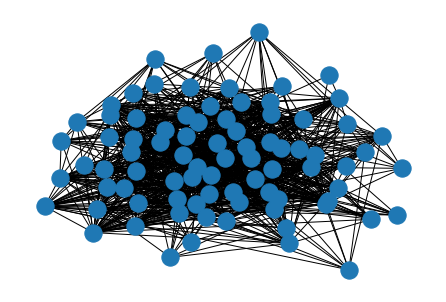

In [ ]:
nx.draw_kamada_kawai(gestructural)

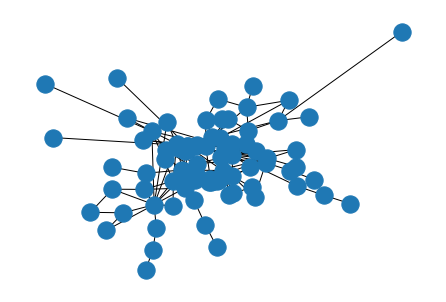

In [ ]:
nx.draw_kamada_kawai(gestructural2)

In [ ]:
print(nx.betweenness_centrality(gestructural))

{1: 0.002024731262551772, 2: 0.0003445113945734535, 3: 0.0006267993669358705, 4: 0.0007697240017864261, 5: 0.00377038052607185, 6: 0.01620499335904213, 7: 2.7374011113848512e-05, 8: 0.00013388962932956596, 9: 0.0007593124016014712, 10: 0.0021723657742159937, 11: 0.006314172237395298, 12: 0.007690689741110456, 13: 0.00199266985753569, 14: 0.00015780861608002673, 15: 0.0, 16: 0.0018150342600381506, 17: 0.003057269208348357, 18: 0.0034140515349110217, 19: 0.014597318533117302, 20: 0.035143076547231034, 21: 0.016686620256956223, 22: 0.025507247866317962, 23: 0.025248734439411058, 24: 0.0010021540652989025, 25: 0.0012978881342912327, 26: 0.001015143873860484, 27: 0.0007150196627773974, 28: 0.004163572518476129, 29: 0.008220140231562138, 30: 0.028239743424487672, 31: 0.022252205988057674, 32: 0.0001136229582746401, 33: 0.003745483721998475, 34: 0.006714426235464471, 35: 0.003756385405814254, 36: 0.00037286114389042284, 37: 0.00198545785382456, 38: 0.019082890000810305, 39: 0.0199759482592040

In [ ]:
print(nx.betweenness_centrality(gestructural2))

{1: 0.002024731262551772, 2: 0.0003445113945734535, 3: 0.0006267993669358705, 4: 0.0007697240017864261, 5: 0.00377038052607185, 6: 0.01620499335904213, 7: 2.7374011113848512e-05, 8: 0.00013388962932956596, 9: 0.0007593124016014712, 10: 0.0021723657742159937, 11: 0.006314172237395298, 12: 0.007690689741110456, 13: 0.00199266985753569, 14: 0.00015780861608002673, 15: 0.0, 16: 0.0018150342600381506, 17: 0.003057269208348357, 18: 0.0034140515349110217, 19: 0.014597318533117302, 20: 0.035143076547231034, 21: 0.016686620256956223, 22: 0.025507247866317962, 23: 0.025248734439411058, 24: 0.0010021540652989025, 25: 0.0012978881342912327, 26: 0.001015143873860484, 27: 0.0007150196627773974, 28: 0.004163572518476129, 29: 0.008220140231562138, 30: 0.028239743424487672, 31: 0.022252205988057674, 32: 0.0001136229582746401, 33: 0.003745483721998475, 34: 0.006714426235464471, 35: 0.003756385405814254, 36: 0.00037286114389042284, 37: 0.00198545785382456, 38: 0.019082890000810305, 39: 0.0199759482592040

In [ ]:
print(nx.betweenness_centrality(gestructural))
print(nx.betweenness_centrality(gestructural2))

{1: 0.002024731262551772, 2: 0.0003445113945734535, 3: 0.0006267993669358705, 4: 0.0007697240017864261, 5: 0.00377038052607185, 6: 0.01620499335904213, 7: 2.7374011113848512e-05, 8: 0.00013388962932956596, 9: 0.0007593124016014712, 10: 0.0021723657742159937, 11: 0.006314172237395298, 12: 0.007690689741110456, 13: 0.00199266985753569, 14: 0.00015780861608002673, 15: 0.0, 16: 0.0018150342600381506, 17: 0.003057269208348357, 18: 0.0034140515349110217, 19: 0.014597318533117302, 20: 0.035143076547231034, 21: 0.016686620256956223, 22: 0.025507247866317962, 23: 0.025248734439411058, 24: 0.0010021540652989025, 25: 0.0012978881342912327, 26: 0.001015143873860484, 27: 0.0007150196627773974, 28: 0.004163572518476129, 29: 0.008220140231562138, 30: 0.028239743424487672, 31: 0.022252205988057674, 32: 0.0001136229582746401, 33: 0.003745483721998475, 34: 0.006714426235464471, 35: 0.003756385405814254, 36: 0.00037286114389042284, 37: 0.00198545785382456, 38: 0.019082890000810305, 39: 0.0199759482592040

(array([[ 3.,  4.,  0., ...,  6.,  0.,  1.],
        [66.,  4.,  3., ...,  0.,  0.,  0.],
        [72.,  3.,  0., ...,  0.,  0.,  0.],
        ...,
        [72.,  6.,  0., ...,  0.,  0.,  0.],
        [66.,  6.,  2., ...,  0.,  0.,  0.],
        [67.,  4.,  1., ...,  0.,  0.,  0.]]),
 array([0.        , 0.5744813 , 1.1489626 , 1.7234439 , 2.2979252 ,
        2.8724065 , 3.4468878 , 4.0213691 , 4.5958504 , 5.1703317 ,
        5.744813  , 6.3192943 , 6.8937756 , 7.4682569 , 8.04273821,
        8.61721951]),
 <a list of 84 Lists of Patches objects>)

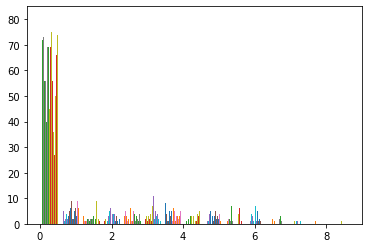

In [ ]:
plt.hist(estruc,bins = 15)


(array([[83.,  0.,  0., ...,  0.,  0.,  1.],
        [84.,  0.,  0., ...,  0.,  0.,  0.],
        [84.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [84.,  0.,  0., ...,  0.,  0.,  0.],
        [84.,  0.,  0., ...,  0.,  0.,  0.],
        [84.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([   0.,  297.,  594.,  891., 1188., 1485., 1782., 2079., 2376.,
        2673., 2970., 3267., 3564., 3861., 4158., 4455.]),
 <a list of 84 Lists of Patches objects>)

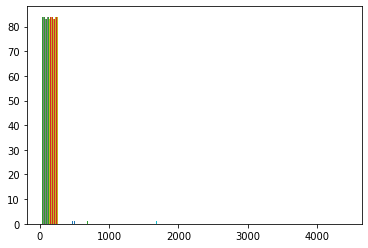

In [ ]:
plt.hist(asd,bins =15)

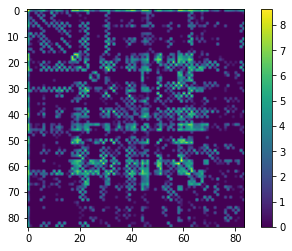

In [ ]:
plt.imshow(estruc)
plt.colorbar()

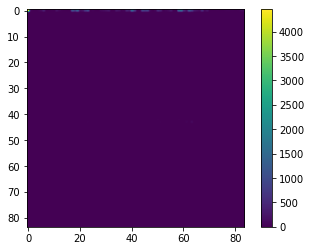

In [ ]:
plt.imshow(asd)
plt.colorbar()

In [ ]:
print(nx.degree(gestructural))

[(1, 17), (2, 11), (3, 13), (4, 13), (5, 20), (6, 36), (7, 10), (8, 10), (9, 13), (10, 15), (11, 25), (12, 27), (13, 18), (14, 10), (15, 8), (16, 15), (17, 27), (18, 28), (19, 36), (20, 46), (21, 35), (22, 43), (23, 39), (24, 14), (25, 14), (26, 15), (27, 14), (28, 24), (29, 28), (30, 42), (31, 38), (32, 14), (33, 22), (34, 30), (35, 22), (36, 12), (37, 14), (38, 38), (39, 39), (40, 38), (41, 45), (42, 18), (43, 14), (44, 57), (45, 49), (46, 57), (47, 17), (48, 9), (49, 18), (50, 28), (51, 30), (52, 22), (53, 27), (54, 29), (55, 29), (56, 25), (57, 10), (58, 47), (59, 44), (60, 28), (61, 28), (62, 51), (63, 56), (64, 27), (65, 22), (66, 21), (67, 32), (68, 33), (69, 25), (70, 10), (71, 9), (72, 18), (73, 17), (74, 7), (75, 3), (76, 24), (77, 18), (78, 9), (79, 9), (80, 13), (81, 11), (82, 17), (83, 16)]
